# House Prices - Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home, I am going to implement a ML regression model to predict each house price.

[you can know more about th data here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

### Linear Regression

In [1]:
# import libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# stats imports
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency 

# sklearn imports
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model building Imports 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Read the preprocessed data

In [2]:
# load data
x = pd.read_csv("train_preprocessed.csv")
y = pd.read_csv("y_preprocessed.csv")

#load test
test = pd.read_csv("test_preprocessed.csv")

In [3]:
x.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,85,86,87,88,89,90,91,92,93,94
1455,1455,-0.357114,-0.260560,0.918511,0.733308,-0.570750,-0.973018,-0.238122,-0.542435,0.795198,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,1456,0.687385,0.266407,0.222975,0.151865,0.087911,0.759659,1.104925,2.355701,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,1457,-0.175462,-0.147810,-1.002492,1.024029,-0.570750,-0.369871,0.215641,0.065656,1.844744,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,1458,-0.084636,-0.080160,-0.704406,0.539493,-0.570750,-0.865548,0.046905,-0.218982,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1459,1459,0.233255,-0.058112,-0.207594,-0.962566,-0.570750,0.847389,0.452784,0.241615,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [4]:
y.head()

,Unnamed: 0,SalePrice
0,0,12.247699
1,1,12.109016
2,2,12.317171
3,3,11.849405
4,4,12.429220


In [5]:
y.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
test.fillna(0, inplace = True)

In [8]:
test = test.reset_index()

In [9]:
x = x.to_numpy()

In [10]:
x.shape

(1460, 96)

In [11]:
y = y.to_numpy()

In [12]:
y.shape

(1460, 1)

In [13]:
test_model = test.to_numpy()

In [14]:
test_model.shape

(1460, 96)

### Split the train data to Train and Cross-Validation

In [15]:
# splitin the data into training and cross-validation
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = .1, random_state = 101)

### Model fit and Evaluation

In [16]:
# initalize the model
lr = LinearRegression()

In [17]:
# fit the model to the data
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
# predict the target for the cv data set
lr_predictions = lr.predict(x_train)

In [19]:
# compute the RMSE, and MSE
MAE = mean_absolute_error(np.expm1(lr_predictions), np.expm1(y_train))
MSE = mean_squared_error(np.expm1(lr_predictions), np.expm1(y_train))
RMSE = np.sqrt(MSE)

In [20]:
# print the RMSE, and MSE
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")

Mean Absolute Error: 15891.773337093991
Mean Squared Error: 1008160079.6715885
Root Mean Squared Error: 31751.536650555805


In [21]:
# get model coeff
lr.coef_

array([[-1.25476978e-05, -3.74753172e-03,  1.27529038e-02,
         3.36262840e-02,  4.45402155e-03, -4.40176549e-03,
         1.94451909e-02,  2.21355254e-03,  1.04415424e-02,
        -2.02131936e-02,  8.78910516e-02,  1.83781045e-02,
         1.19139132e-02,  2.73698483e-02,  2.19583369e-02,
         4.39016856e-02,  1.37102254e-03,  1.13348117e-02,
         1.19549403e-02,  5.22501979e-03,  7.74889497e-02,
         4.45936906e-02, -1.81723824e-03,  1.61685074e-03,
         2.14197077e-02,  7.95832382e-03,  1.99517133e-02,
         2.39781862e-02,  1.53286351e-02,  4.10797410e-03,
        -1.83612707e+07, -4.59158380e+07, -2.31772722e+07,
        -9.09359554e+07, -7.93428466e+07,  1.49681555e+08,
         1.49681555e+08,  1.03316100e+09,  6.59830415e+08,
         4.74529334e+08,  1.40525046e+08,  1.20637133e+09,
         2.45159322e+07,  8.45248764e+06,  2.37921874e+07,
         4.46353339e+07,  3.13430539e+07,  6.93860336e+07,
         4.19596029e+07,  5.77245078e+07,  5.17012650e+0

In [22]:
# get the intercept value
lr.intercept_

array([12.03329768])

In [23]:
# get the r2 
r2_score(y_train, lr_predictions)

0.8977495428440001

In [24]:
# get the residuals 
residuals = np.expm1(lr_predictions) -  np.expm1(y_train)

C:\Users\original\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

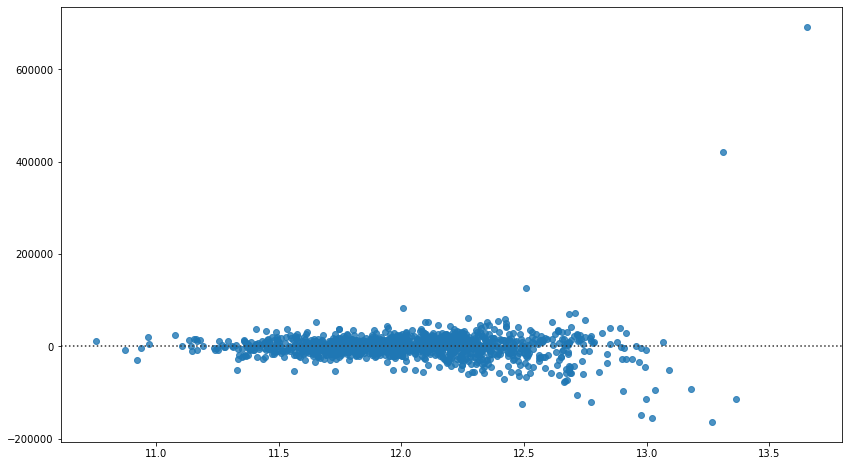

In [25]:
# plot residuals plot
plt.figure(figsize=(14, 8))
sns.residplot(lr_predictions, residuals)

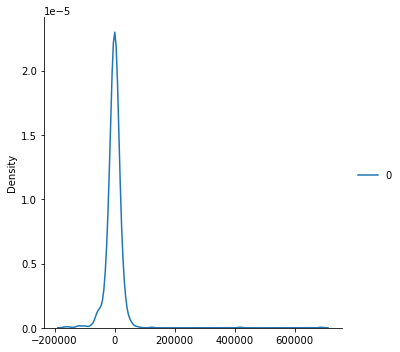

In [26]:
# draw the distribution of residuals
sns.displot(residuals, kind = "kde")

In [27]:
# PREDICT ON BOTH TRAIN AND TEST CV
lr_pred_cv = lr.predict(x_cv)

# Calculate Errors
# compute the RMSE, and MSE
MAE_2 = mean_absolute_error(np.expm1(lr_pred_cv), np.expm1(y_cv))
MSE_2 = mean_squared_error(np.expm1(lr_pred_cv), np.expm1(y_cv))
RMSE_2 = np.sqrt(MSE_2)

In [28]:
# print the RMSE, and MSE
print(f"Mean Absolute Error: {MAE_2}")
print(f"Mean Squared Error: {MSE_2}")
print(f"Root Mean Squared Error: {RMSE_2}")

Mean Absolute Error: 15452.33099178721
Mean Squared Error: 475235634.4467915
Root Mean Squared Error: 21799.89987240289


In [29]:
cross_val_error = cross_val_score(lr, x_train, y_train, cv = 5)

In [30]:
cross_val_error

array([ 7.82693142e-01,  8.88099341e-01, -3.70011583e+15,  8.72927112e-01,
        8.70483714e-01])

In [31]:
cross_val_error.mean()

-740023166275727.6

### ElasticNet

In [32]:
# init the ElasticNet model
l1_space = np.linspace(0, 1, 50)
param_grid = {'l1_ratio': l1_space}
elastic_net = ElasticNet()

In [33]:
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10, scoring = 'neg_root_mean_squared_error')
gm_cv.fit(x_train, y_train)

C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.133938059968358, tolerance: 0.018386478671333327
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.442334286311173, tolerance: 0.01899585960857885
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.63300294585898, tolerance: 0.019359376732211792
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [34]:
gm_cv.score(x_train, y_train)

-0.1414507134612694

### Ridge Model

In [35]:
# init the model
alpha_space = np.linspace(0, 1, 50)
params_grid = {'alpha':alpha_space}
ridge = Ridge()

In [36]:
ridge_cv = GridSearchCV(ridge, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
ridge_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [37]:
ridge_cv.score(x_train, y_train)

-0.12810222273899952

### Lasso

In [38]:
# init the model
alpha_space = np.linspace(0, 1, 50)
params_grid = {'alpha':alpha_space}
lasso = Lasso()

In [39]:
lasso_cv = GridSearchCV(lasso, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
lasso_cv.fit(x_train, y_train)

C:\Users\original\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.739190440573339, tolerance: 0.018386478671333327
  model = cd_fast.enet_coordinate_descent(
C:\Users\original\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegres

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [40]:
lasso_model = lasso_cv.best_estimator_

In [41]:
r2_score(y_train, lasso_model.predict(x_train))

0.8977495523787711

### SGD Regressor

In [42]:
# init the model
alpha_space = np.linspace(0, 1, 30)
params_grid = {'alpha':alpha_space}
SGD = SGDRegressor()

In [43]:
SGD_cv = GridSearchCV(SGD, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
SGD_cv.fit(x_train, y_train)

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\original\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [44]:
SGD_cv.score(x_train, y_train)

-114354672830156.2

### Pickle the model

In [45]:
import pickle

In [46]:
pickle.dump(lasso_model, open("LassoLinearModel.pkl", "wb"))

In [47]:
test_pickle = pickle.load(open("LassoLinearModel.pkl", "rb"))

In [48]:
r2_score(y_train, test_pickle.predict(x_train))

0.8977495523787711

## Prediction Using Lasso Model

In [49]:
# get the prediction with exponential value to reverse the log transformation
test_submission = np.expm1(lasso_model.predict(test))

In [50]:
submission = pd.DataFrame({"Id" : test.index, "Saleprice" : test_submission})

In [51]:
submission

,Id,Saleprice
0,0,126809.476034
1,1,163344.907410
2,2,178961.362558
3,3,200388.322504
4,4,208423.309674
...,...,...
1455,1455,113036.178999
1456,1456,158780.317397
1457,1457,150995.037831
1458,1458,228092.124609


In [52]:
submission.to_csv("submission.csv", index = False)

In [53]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Initial Submission"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/34.0k [00:00<?, ?B/s]
 24%|##3       | 8.00k/34.0k [00:00<00:01, 25.3kB/s]
100%|##########| 34.0k/34.0k [00:02<00:00, 16.4kB/s]
